In [9]:
import torch
import matplotlib.pyplot as plt

In [10]:
weight=.6
bias=.4


start=0
end =1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X
X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.0000],
         [0.0120],
         [0.0240],
         [0.0360],
         [0.0480],
         [0.0600],
         [0.0720],
         [0.0840],
         [0.0960],
         [0.1080]]),
 50,
 50)

In [11]:
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]  
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [12]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
    """Plots training data, test data and predictions if provided."""
    plt.figure(figsize=(10,6))
    plt.scatter(train_data, train_labels, c="black", s=4, label="Train data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":15})
    

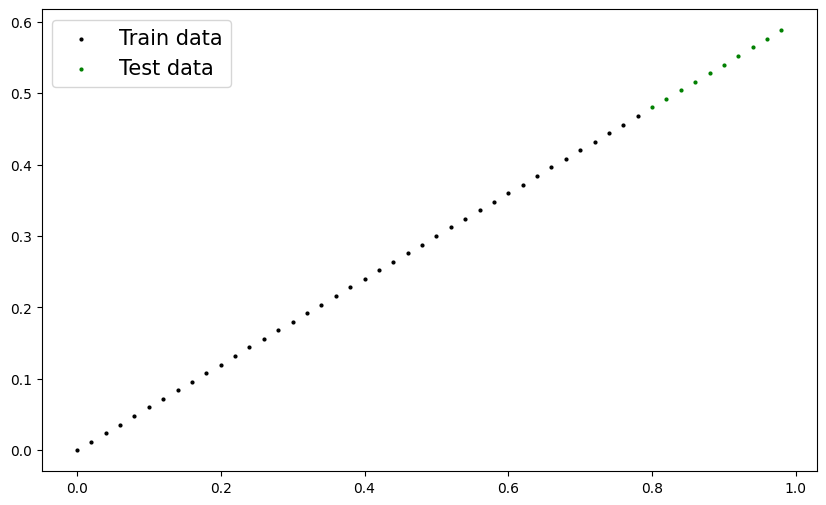

In [13]:
plot_predictions()